# **CODERS CAVE INTERNSHIP AUGUST 2023**
# **Exploratory Data Analysis - Terrorism**
# **NINAD NILESH SUGANDHI**

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [4]:
warnings.filterwarnings('ignore')

**Importing data using pandas pd.read_csv()**

In [5]:
#Import Data
data=pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\globalterrorismdb_0718dist.csv", encoding = 'latin1')
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [10]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
data.shape

(181691, 135)

In [12]:
data.index

RangeIndex(start=0, stop=181691, step=1)

In [13]:
data.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,201712310016,2017,12,31,NaN,0,NaN,160,Philippines,5,...,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,201712310017,2017,12,31,NaN,0,NaN,98,Italy,8,...,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181685,201712310020,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""4 people injured in Farayb explosion,"" Pajhwo...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [14]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**SNS plot that describes the number of global terrorist attacks with respect to year from 1970 to 2017**

**The plot shows that most Terrorist attacks have occured in the year 2015 and the least number of attacks were held in the year 1971**

Text(0, 0.5, 'Attack')

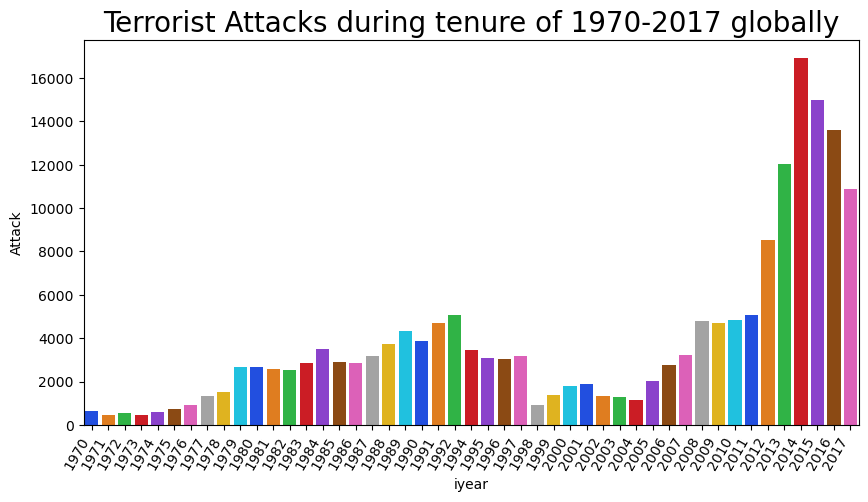

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='iyear',data=data,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Terrorist Attacks during tenure of 1970-2017 globally',size=20)
plt.ylabel('Attack')

**SNS countplot which describes number of terrorist attacks as per month**

**The plot shows that most terrorist attacks have occured in May and least terrorist attacks have occured in February**

Text(0, 0.5, 'Attack')

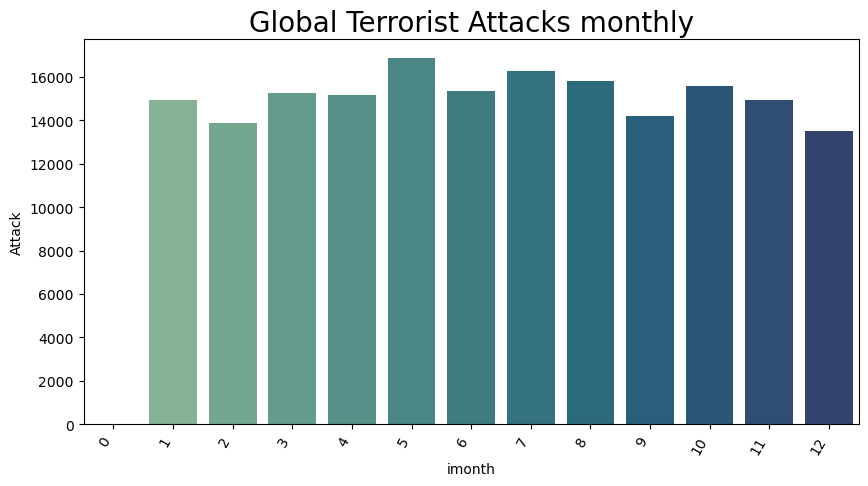

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='imonth',data=data,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Global Terrorist Attacks monthly',size=20)
plt.ylabel('Attack')

**The following SNS plot represents the number of terrorist attacks on the basis of the month**

Text(0, 0.5, 'Attack')

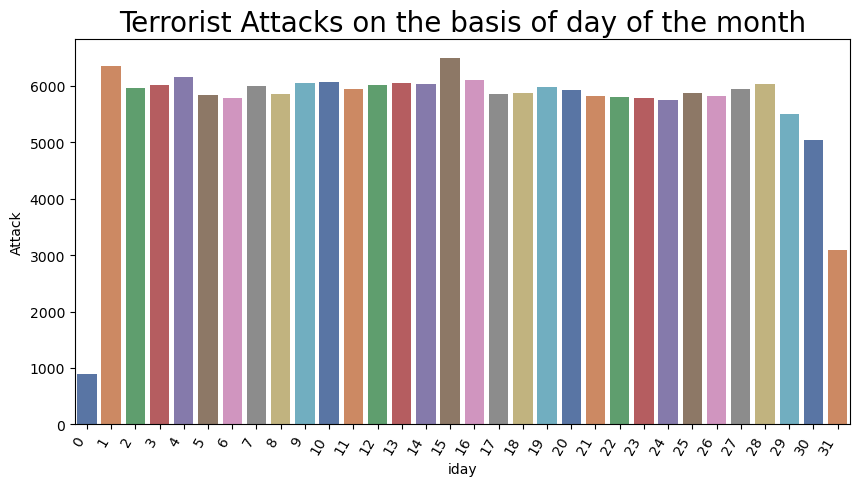

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='iday',data=data,palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Terrorist Attacks on the basis of day of the month',size=20)
plt.ylabel('Attack')

**The SNS plot represents the number of attacks happened in each country**

Text(0, 0.5, 'Number of Attacks')

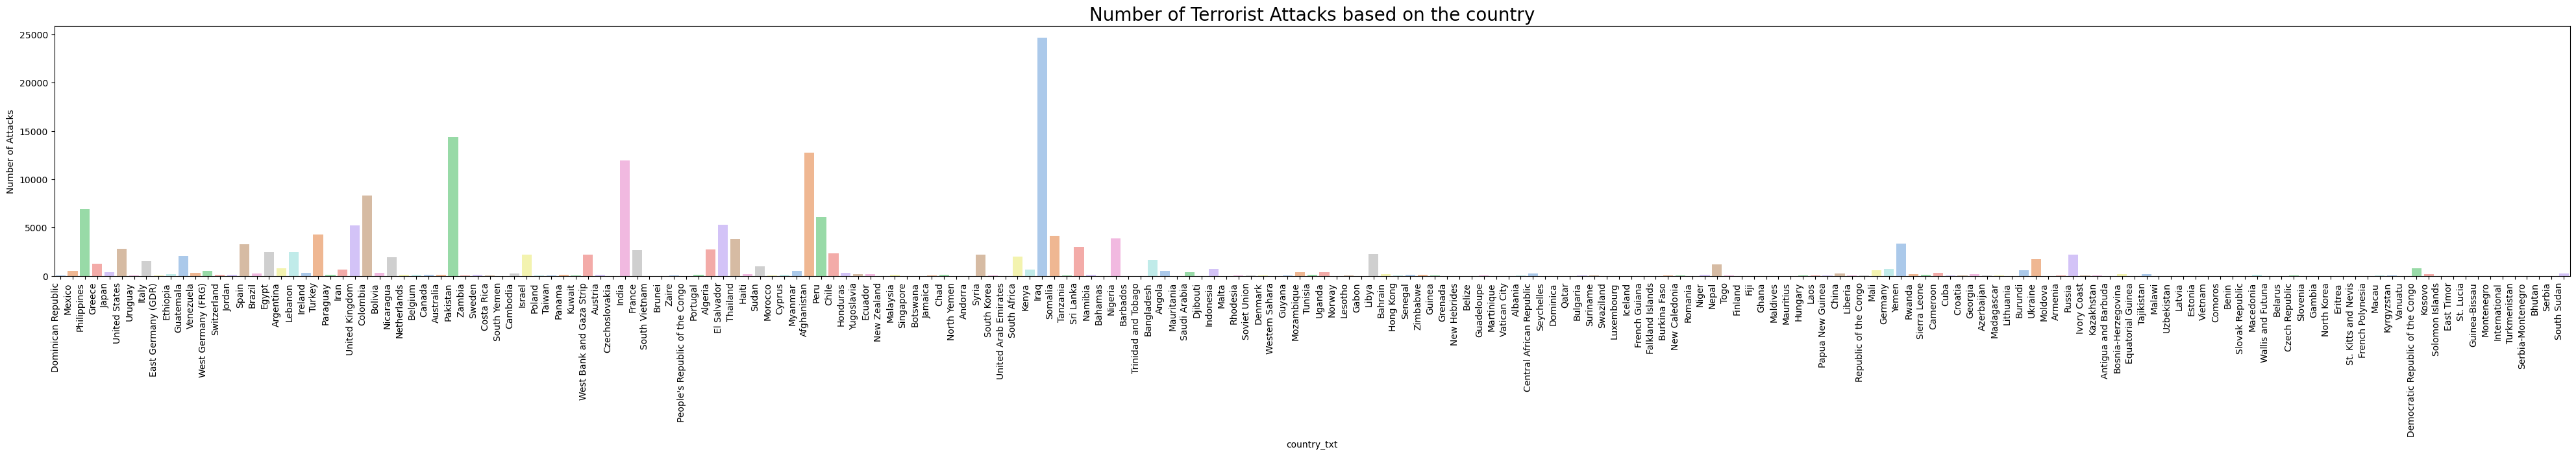

In [18]:
plt.figure(figsize=(50,5))
ax = sns.countplot(x='country_txt',data=data,palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Number of Terrorist Attacks based on the country',size=20)
plt.ylabel('Number of Attacks')

**The following histogram represents the number of terrorist attacks happened all over the years**

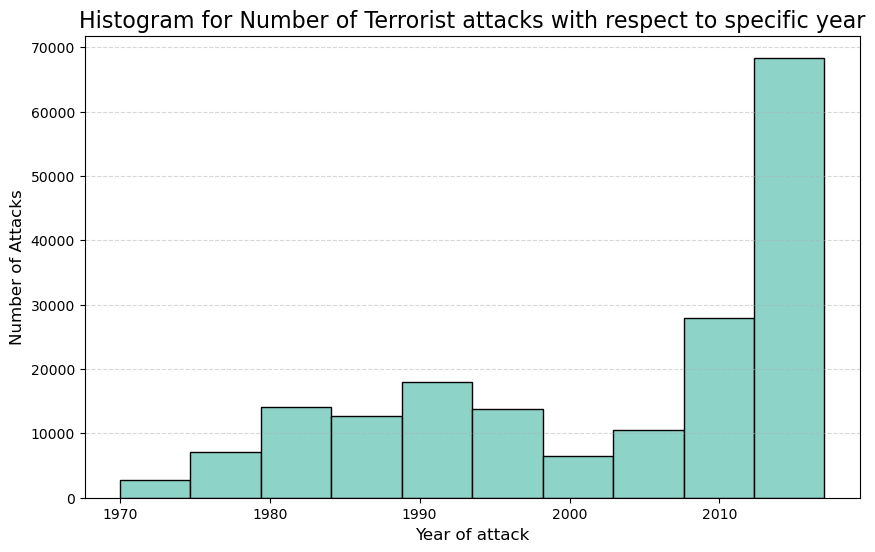

In [19]:
unique_categories = data.head(100)['iyear'].unique()

# Get the number of unique categories
num_categories = len(unique_categories)

# Choose a color palette with the same number of colors as categories
color_palette = sns.color_palette("Set3", num_categories)

plt.figure(figsize=(10, 6))
plt.hist(data['iyear'], color=color_palette, edgecolor='black')

# Add a title and axis labels
plt.title('Histogram for Number of Terrorist attacks with respect to specific year', fontsize=16)
plt.xlabel('Year of attack', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)

# Customize the tick labels and grid
plt.xticks(fontsize=10)  # Adjust the font size of x-axis tick labels
plt.yticks(fontsize=10)  # Adjust the font size of y-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**The following histogram represents different types of terrorist attacks and the frequency of each terrorist attack**

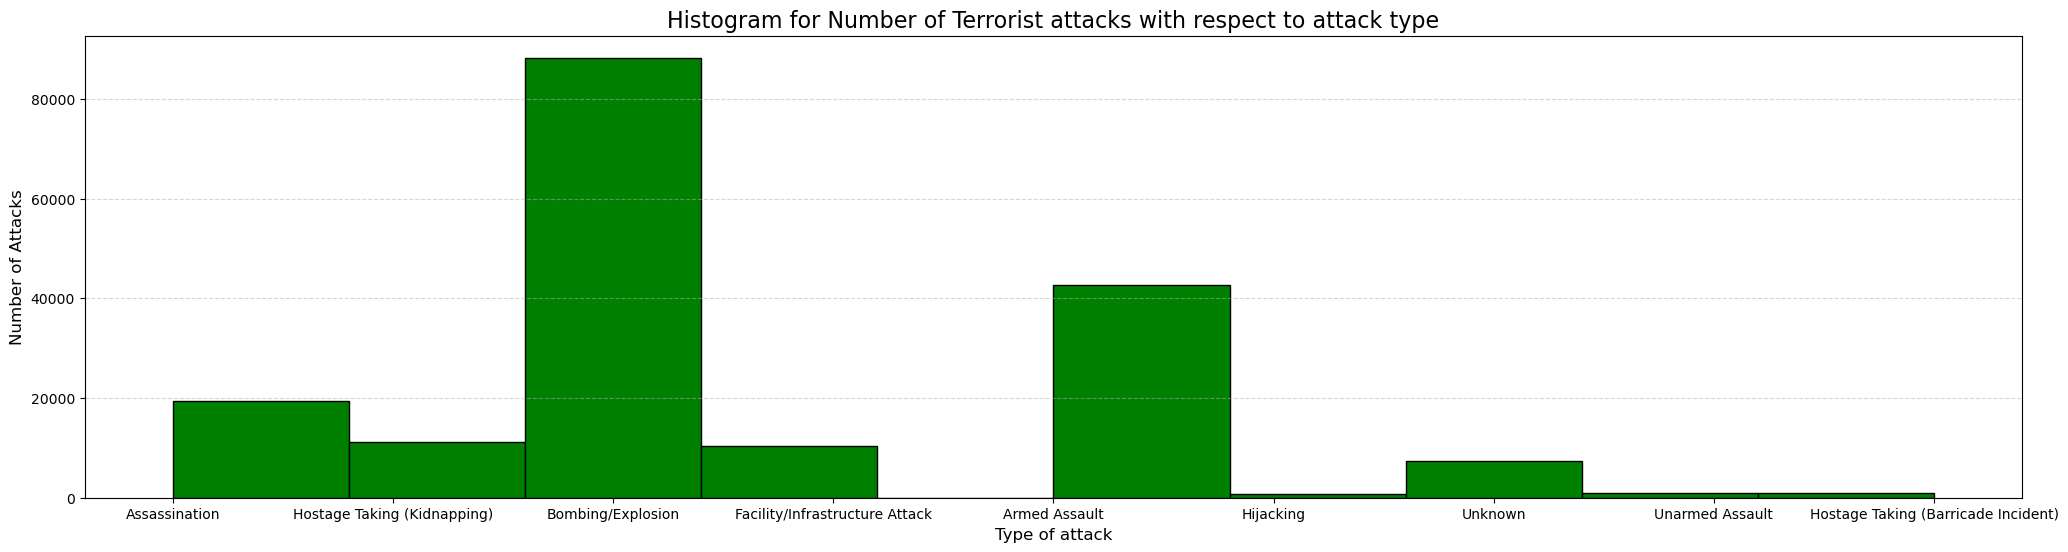

In [20]:
plt.figure(figsize=(25, 6))
plt.hist(data['attacktype1_txt'], color="green", edgecolor='black')

# Add a title and axis labels
plt.title('Histogram for Number of Terrorist attacks with respect to attack type', fontsize=16)
plt.xlabel('Type of attack', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)

# Customize the tick labels and grid
plt.xticks(fontsize=10)  # Adjust the font size of x-axis tick labels
plt.yticks(fontsize=10)  # Adjust the font size of y-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**The following boxplot represents the correlation between the year and country**

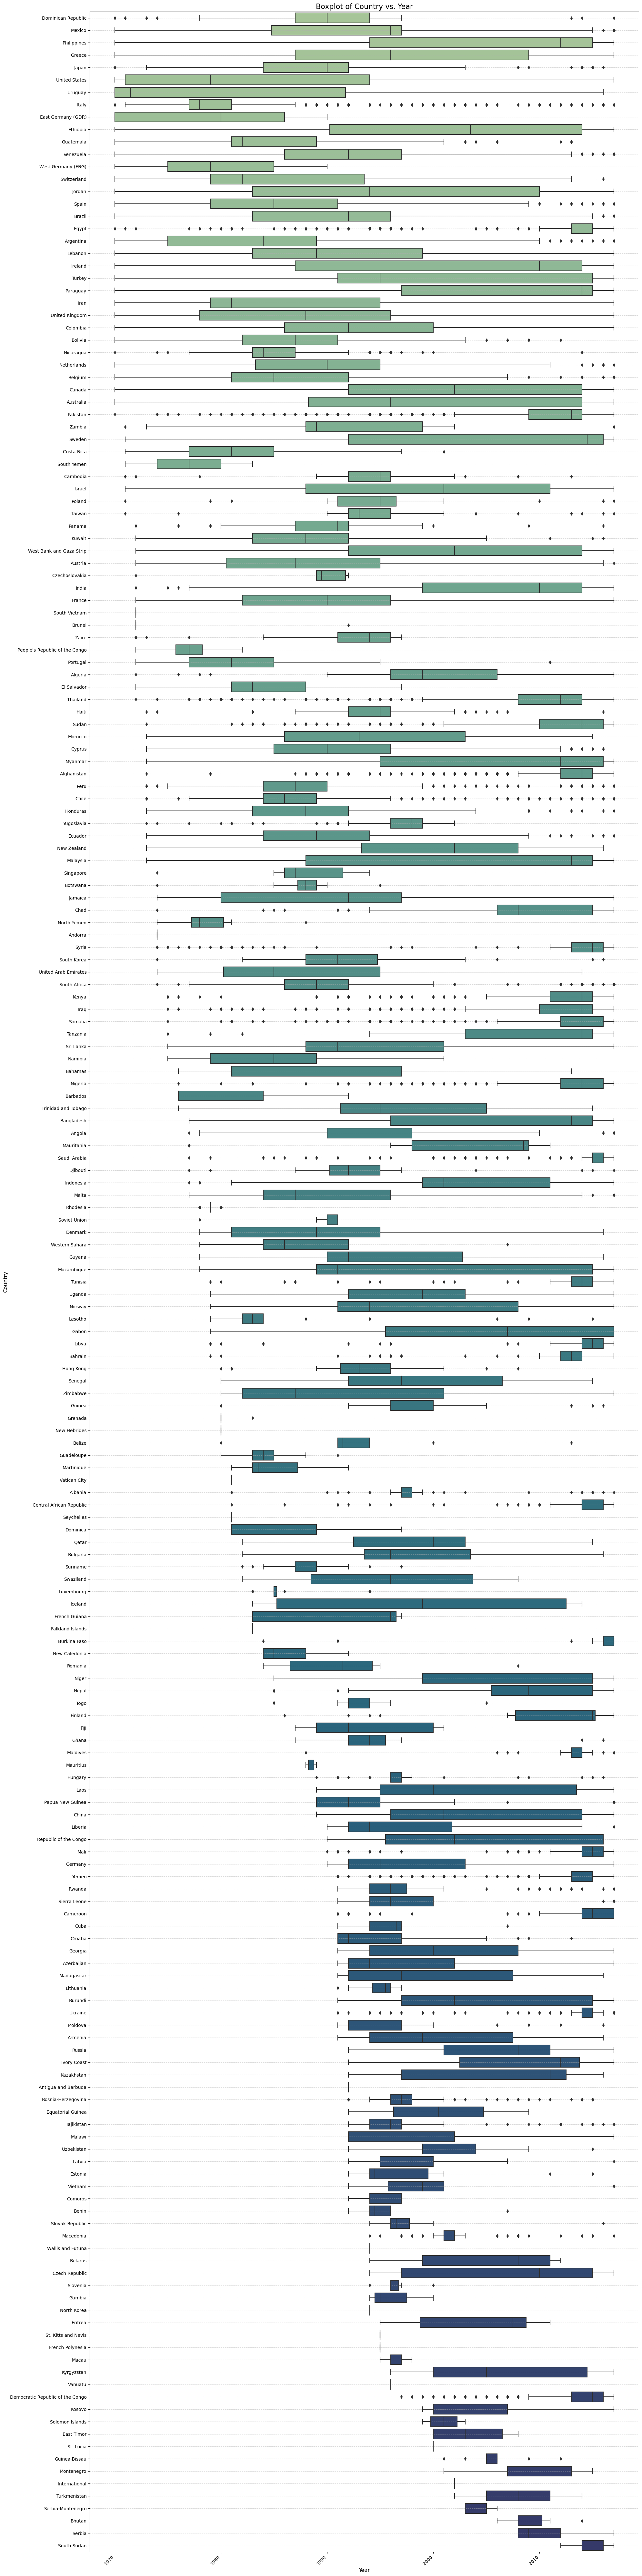

In [21]:
plt.figure(figsize=(20, 80))  # Adjust the figure size

# Create the boxplot
ax = sns.boxplot(x=data['iyear'], y=data['country_txt'], palette = "crest")

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a title and axis labels
plt.title('Boxplot of Country vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Customize the tick labels and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust the plot layout to prevent x-axis label overlap
plt.tight_layout()

# Show the plot
plt.show()

**The following crosstab plot represents the number of terrorist activities in respective regions**

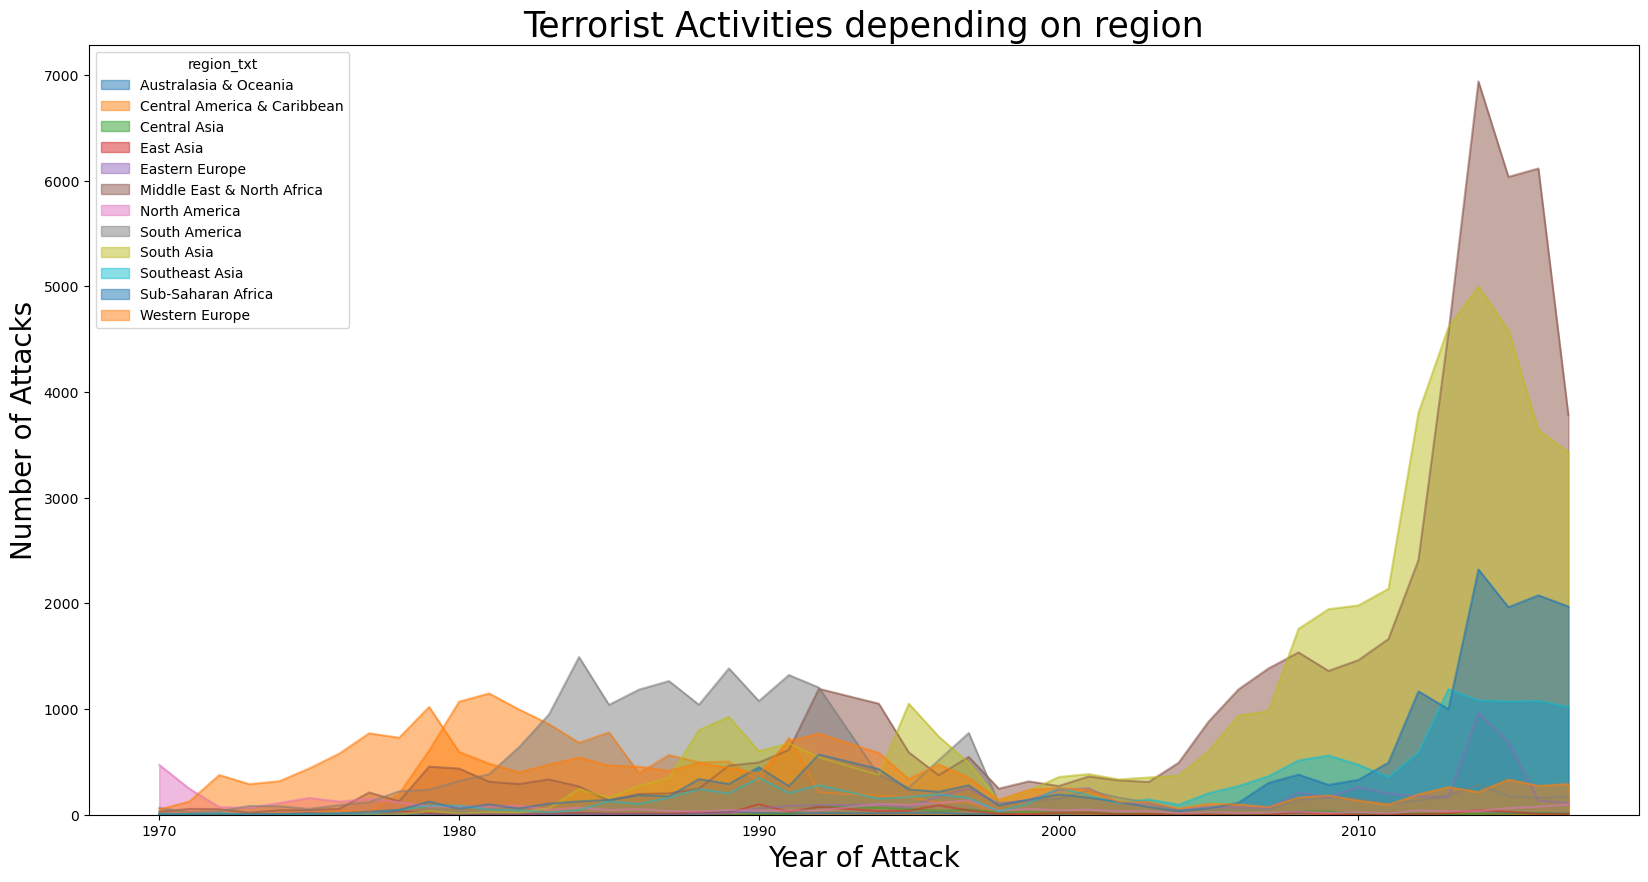

In [22]:
pd.crosstab(data.iyear, data.region_txt).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities depending on region',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year of Attack",fontsize=20)
plt.show()

**The following plots represents the frequency of people died and injured due to terrorist activities in respective year**

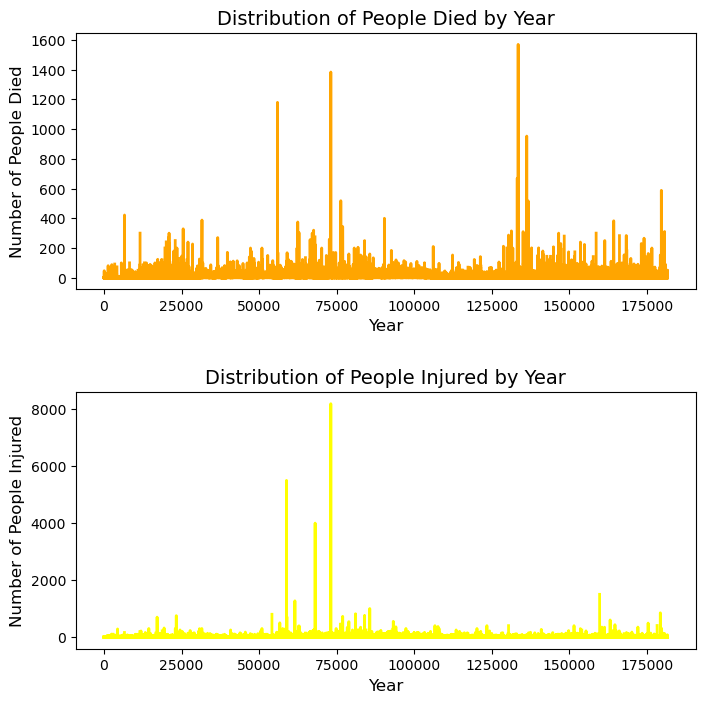

In [23]:
data1 = data[['iyear', 'nkill', 'nwound']].copy()

data1 = data1.groupby(by=['iyear']).sum()

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axs[0].plot(data.index, data['nkill'], color='orange', linewidth=2)
axs[0].set_title('Distribution of People Died by Year', fontsize=14)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Number of People Died', fontsize=12)

axs[1].plot(data.index, data['nwound'], color='yellow', linewidth=2)
axs[1].set_title('Distribution of People Injured by Year', fontsize=14)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Number of People Injured', fontsize=12)

plt.subplots_adjust(hspace=0.4)

plt.show()

**The following plot represents the comparision of number of people died or injured due to terrorist attacks in the resepective year**

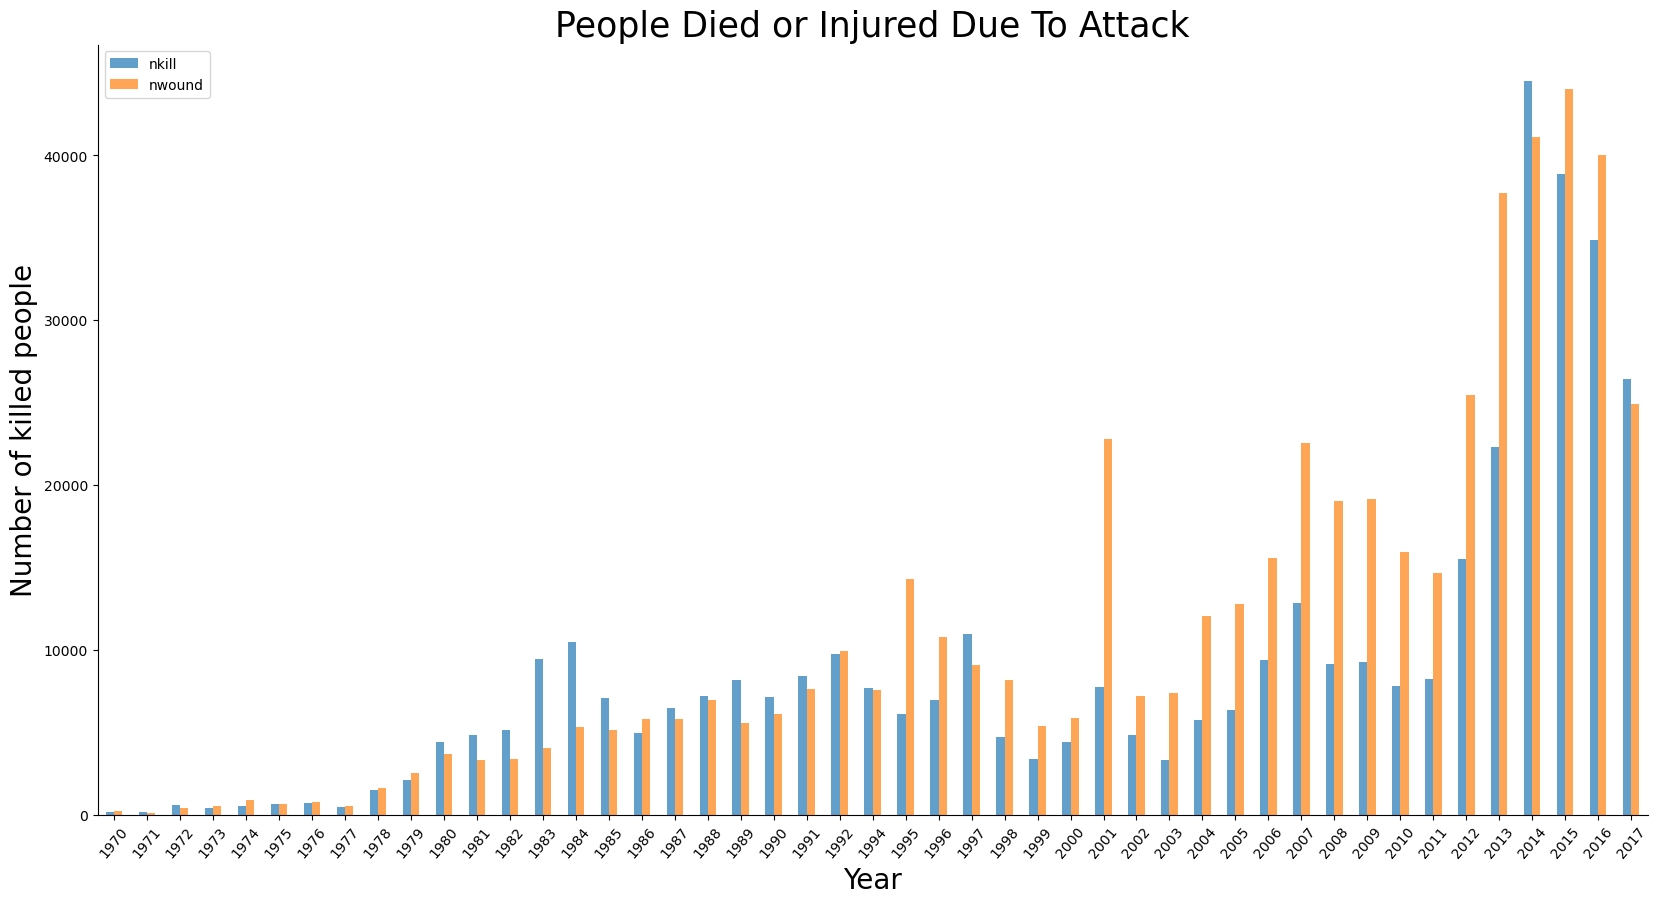

In [24]:
fig, ax4 = plt.subplots(figsize=(20,10))
data1.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died or Injured Due To Attack",fontsize=25)
plt.ylabel("Number of killed people",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

**The following plot describes the frequency of people died in the respective year**

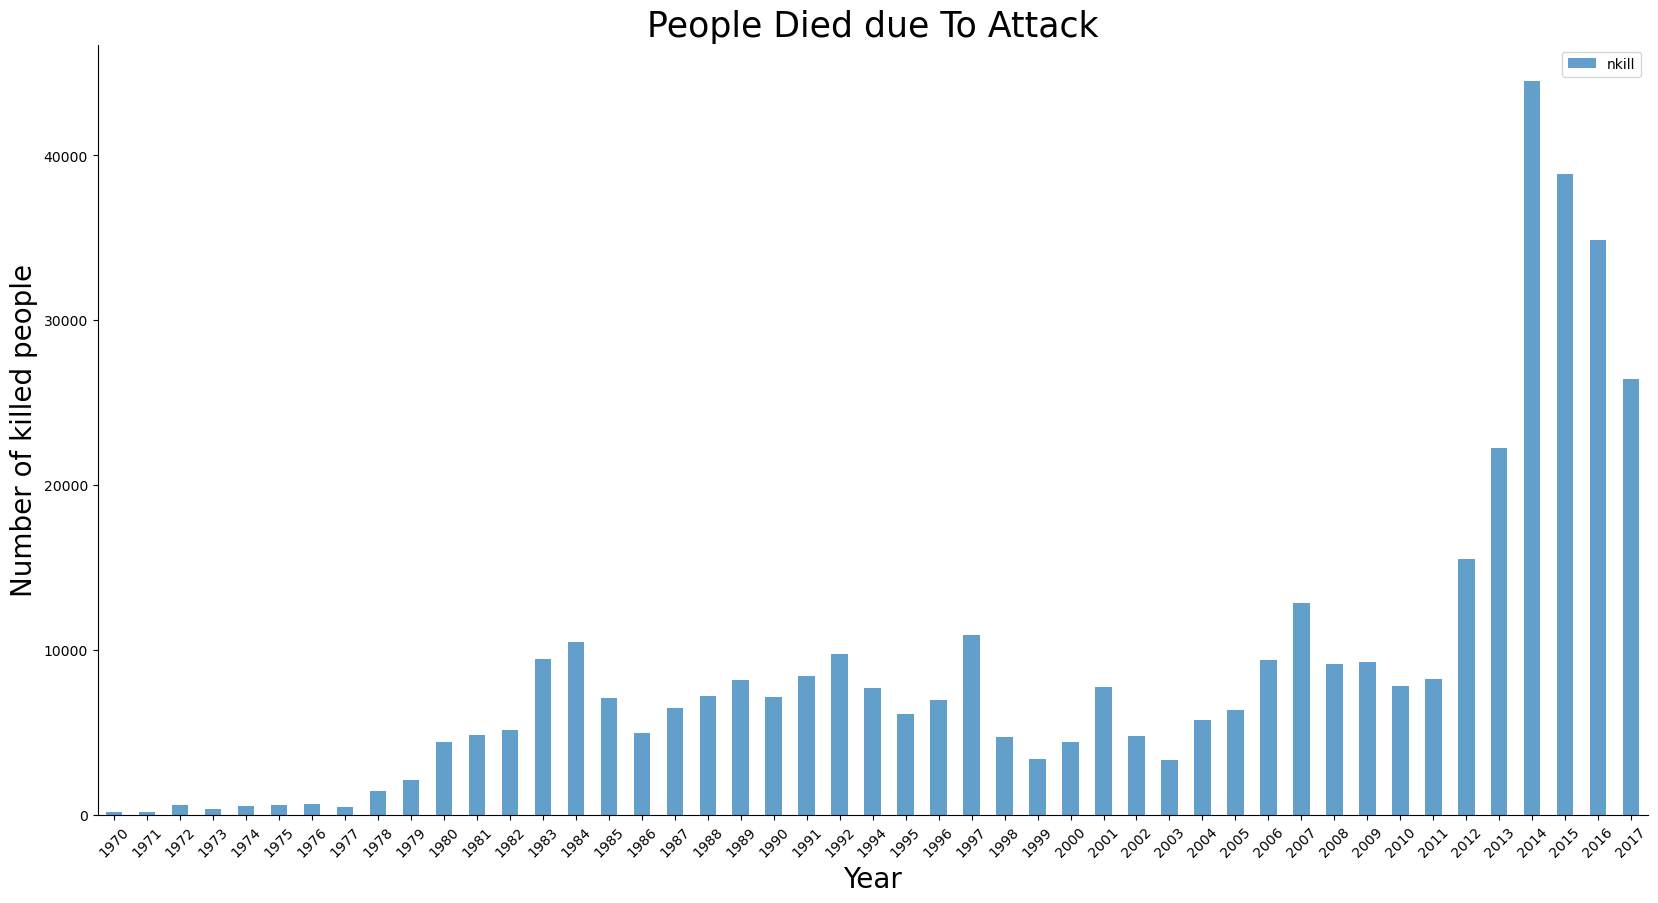

In [25]:
data2 = data[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data2.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 45)
plt.title("People Died due To Attack",fontsize=25)
plt.ylabel("Number of killed people",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

**The following plot represents the top 10 cities with highest number of terrorist attacks along with the exact number on the respective label**

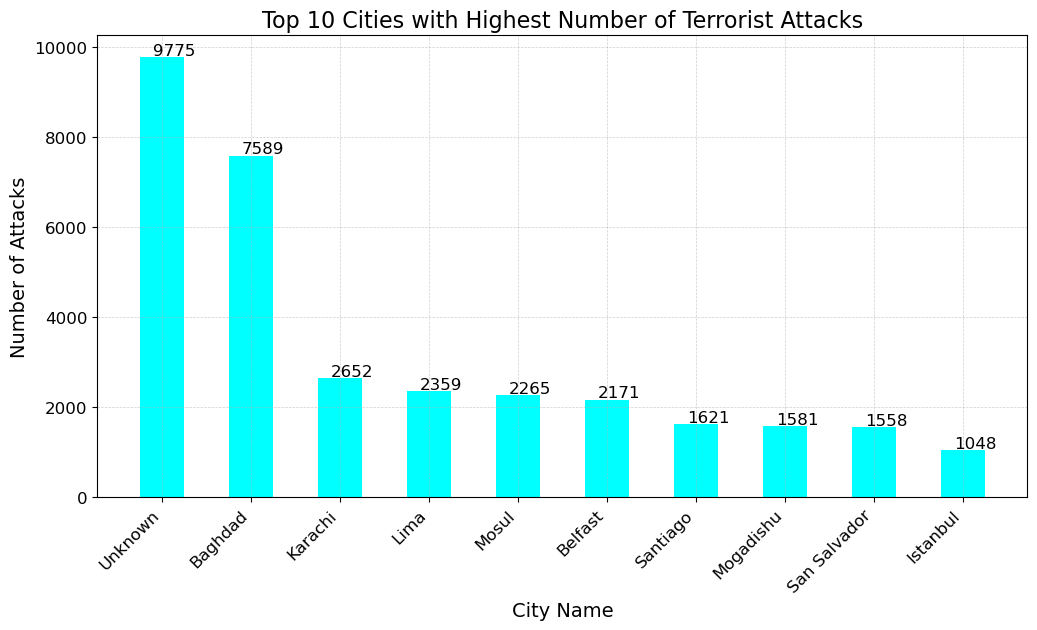

In [26]:
city_counts = data['city'].value_counts().to_frame().sort_values('city', axis=0, ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(city_counts.index, city_counts['city'], color=['cyan'], width=0.5)

ax.set_title('Top 10 Cities with Highest Number of Terrorist Attacks', fontsize=16)
ax.set_xlabel('City Name', fontsize=14)
ax.set_ylabel('Number of Attacks', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(city_counts.index, rotation=45, ha='right')

for i, v in enumerate(city_counts['city']):
    ax.text(i - 0.1, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

**The following plot represents the exact number of terrorist attacks labeled on the respective attack type**

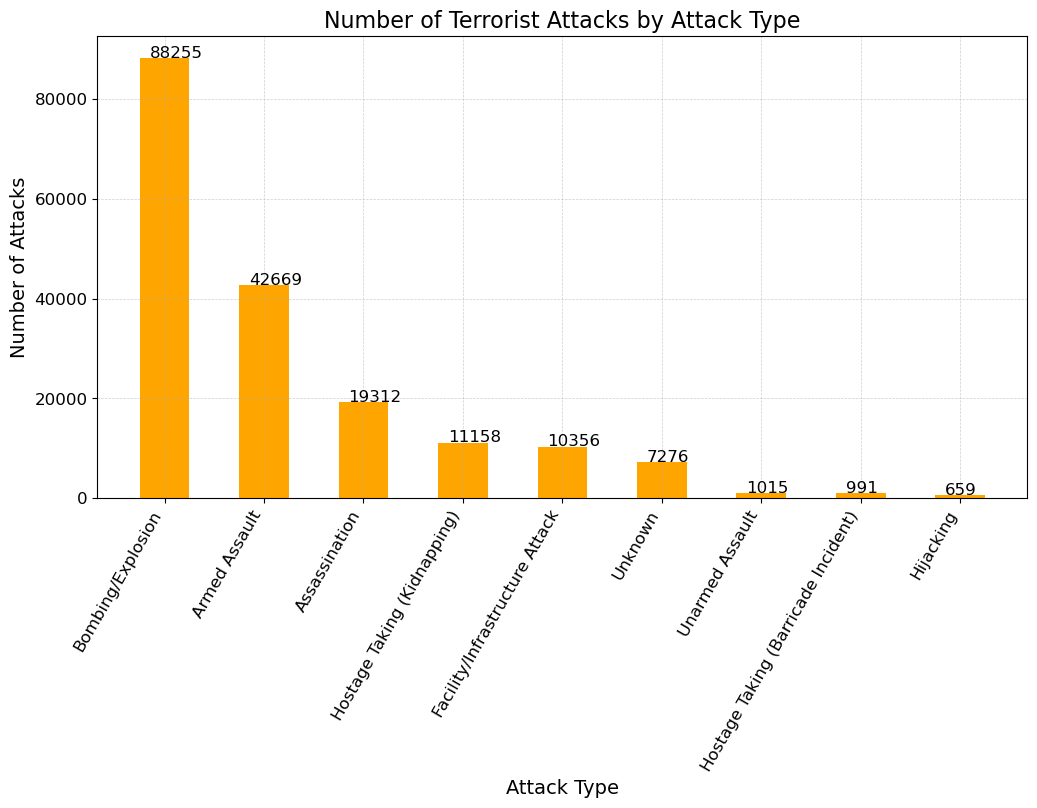

In [27]:
attack_counts = data['attacktype1_txt'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(attack_counts.index, attack_counts.values, color='orange', width=0.5)

ax.set_title('Number of Terrorist Attacks by Attack Type', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Number of Attacks', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

ax.set_xticklabels(attack_counts.index, rotation=60, ha='right')

for i, v in enumerate(attack_counts.values):
    ax.text(i - 0.15, v + 50, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

**The following plot represents the number of people killed through terrorist attacking group.**

**The plot describes that most people have been targeted by unknown organizations and those are not diagnosed or predicted by the Security organizations.**

**While the least people have died due to the TTP terrorist activities**

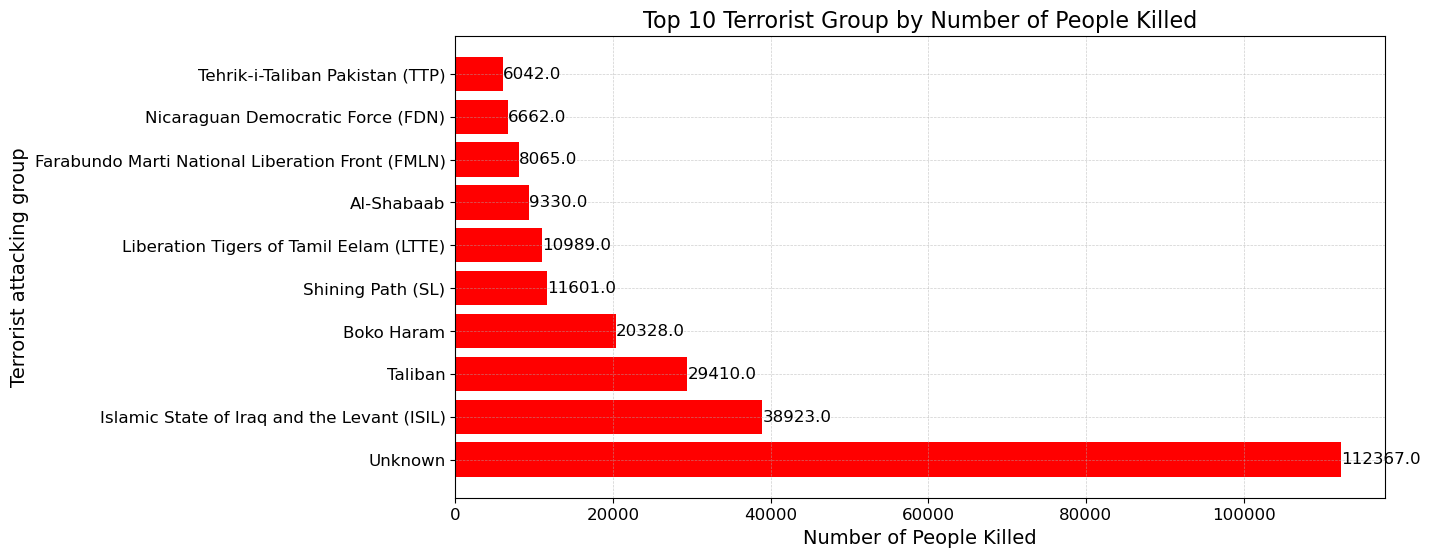

In [28]:
data3 = data[['gname','nkill']].groupby(['gname']).sum()

data3 = data3.sort_values('nkill', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(data3.index, data3['nkill'], color='red')

ax.set_title('Top 10 Terrorist Group by Number of People Killed', fontsize=16)
ax.set_xlabel('Number of People Killed', fontsize=14)
ax.set_ylabel('Terrorist attacking group', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
for i, v in enumerate(data3['nkill']):
    ax.text(v + 50, i - 0.1, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

**The following plot describes the number of attacks planned by the respective organizations**

**According to the plot, Taliban has conducted most number of terrorist attacks while least number of attacks are conducted by PKK organization**

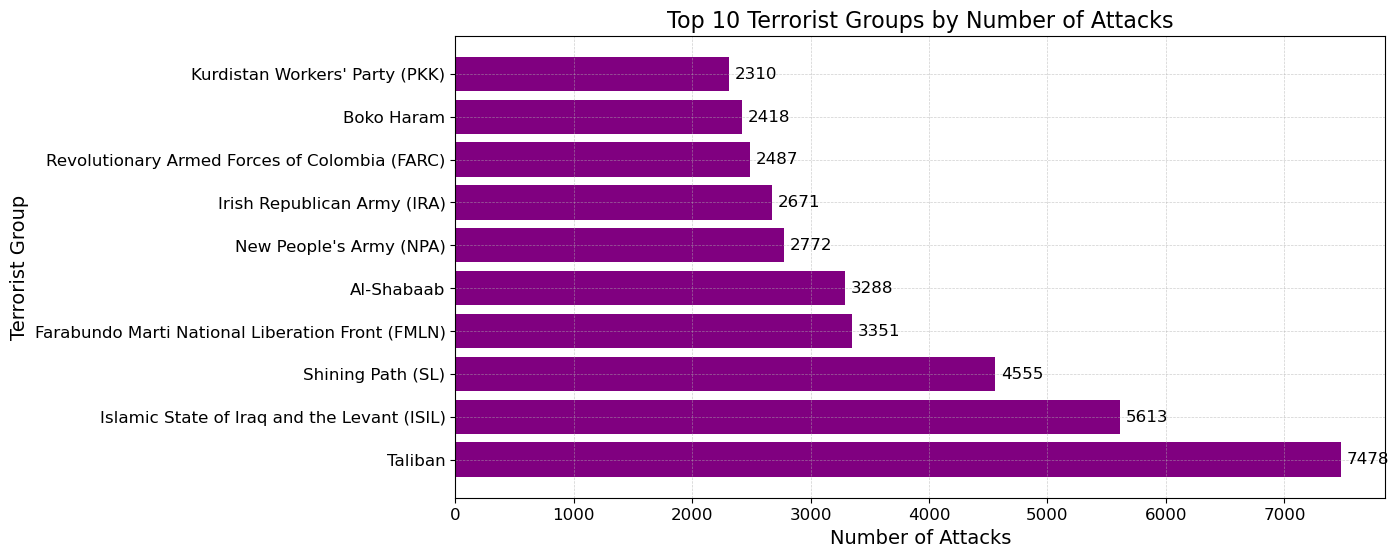

In [29]:
group_counts = data['gname'].value_counts().to_frame().drop('Unknown').head(10)

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(group_counts.index, group_counts['gname'], color='purple')

ax.set_title('Top 10 Terrorist Groups by Number of Attacks', fontsize=16)
ax.set_xlabel('Number of Attacks', fontsize=14)
ax.set_ylabel('Terrorist Group', fontsize=14)

ax.tick_params(axis='both', labelsize=12)

for i, v in enumerate(group_counts['gname']):
    ax.text(v + 50, i - 0.1, str(v), fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

**The following wordcloud consists of all countries which have been attacked by the terrorist activists**

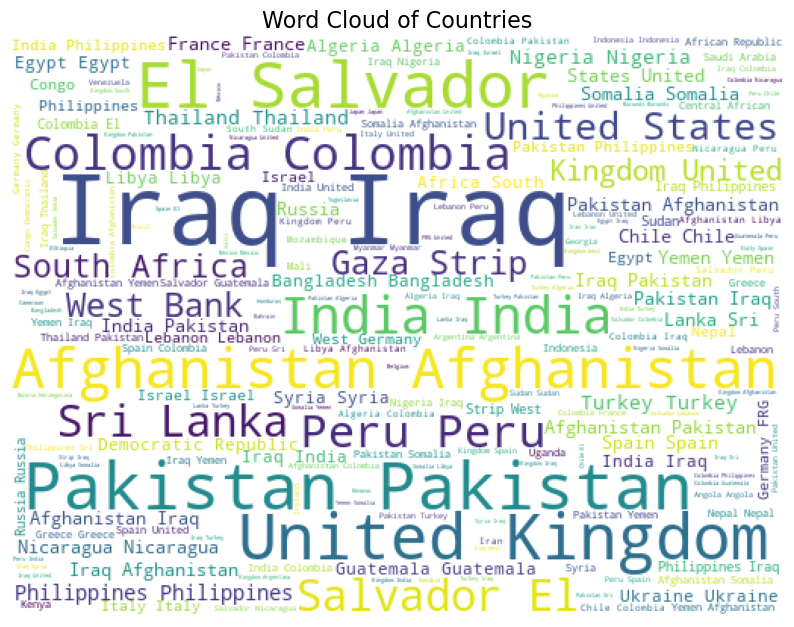

In [30]:
countries = data.country_txt.dropna(False)

plt.subplots(figsize=(10, 10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(countries))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of Countries', fontsize=16)  # Adjust the title
plt.show()

**The following wordcloud consists of types of attacks adopted for attacking by the terrorist activists**

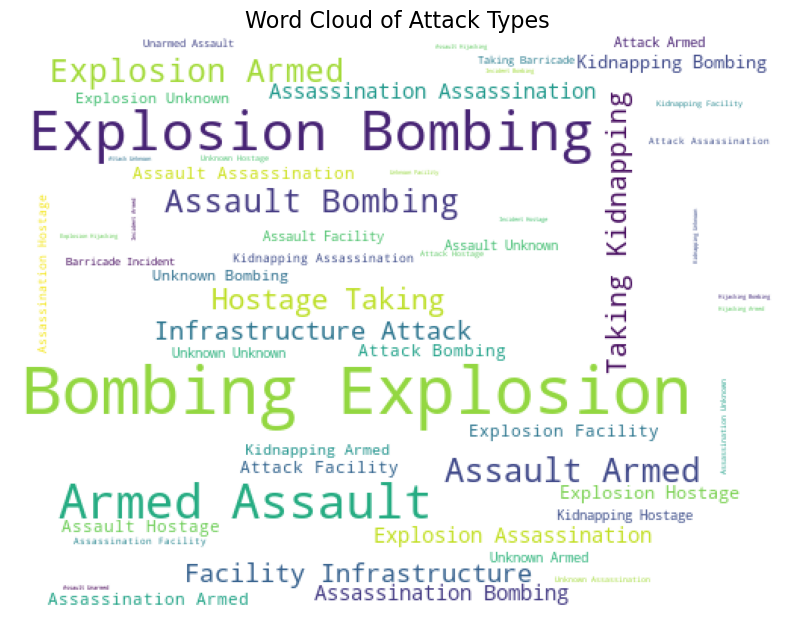

In [31]:
from wordcloud import WordCloud

attack_types = data.attacktype1_txt.dropna(False)

plt.subplots(figsize=(10, 10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(attack_types))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Word Cloud of Attack Types', fontsize=16)  # Adjust the title
plt.show()

**The following figure describes the distribution of attack types using pie - chart**

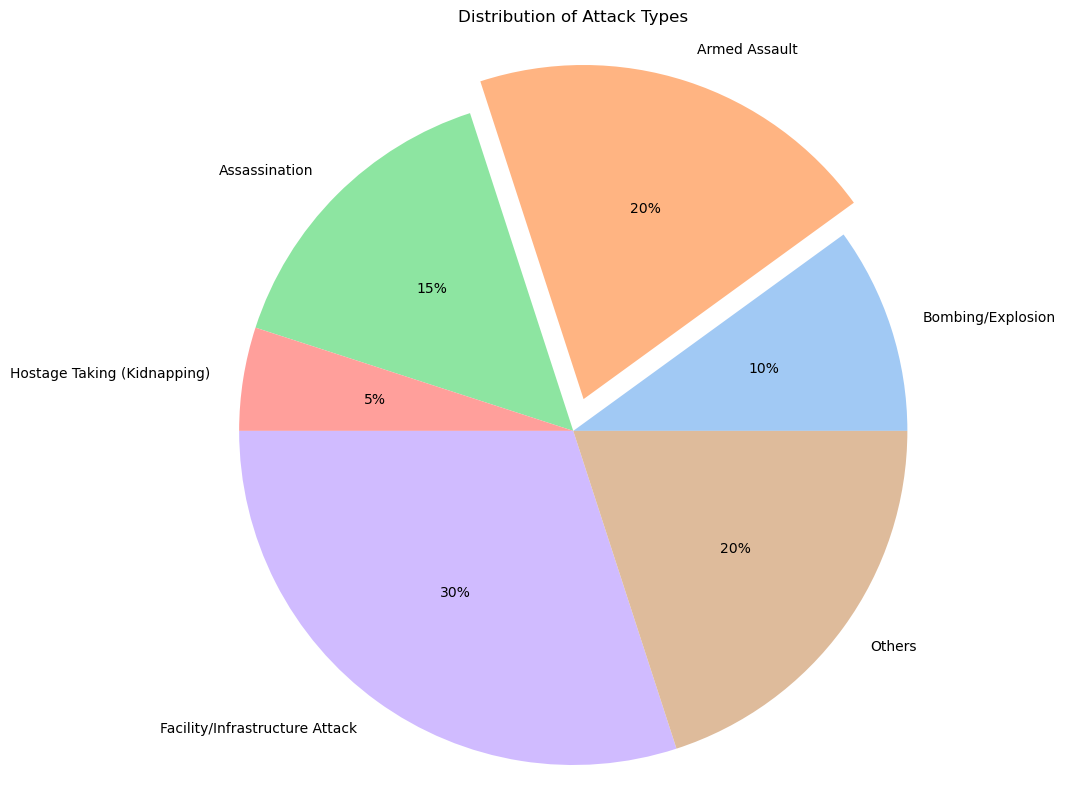

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Bombing/Explosion', 'Armed Assault', 'Assassination',
          'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Others']

colors = sns.color_palette('pastel')[0:6]

attack_type_percentages = [10, 20, 15, 5, 30, 20]

plt.figure(figsize=(10, 10))
plt.title('Distribution of Attack Types')

explode = (0, 0.1, 0, 0, 0, 0)  # Explode the "Armed Assault" slice

plt.pie(attack_type_percentages, labels=labels, colors=colors, explode=explode, autopct='%.0f%%')

plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

**The following data will be used to plot multiple figures in one template to describe the summary of the data visualization**

In [33]:
#Preparing the data for analysis
Pakistan = data[data.country_txt == 'Pakistan']
Pakistan_cities = Pakistan.groupby(by='city',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Pakistan_suicide_size = Pakistan['suicide'].sum() / len(Pakistan)
labels = ['Suicide', 'Not Suicide']

Pakistan_year = Pakistan.groupby(by='iyear', as_index=False).sum().loc[:, ['iyear', 'nkill']]

Pakistan_weapon = Pakistan.groupby(by='weapsubtype2_txt',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]
Pakistan_attack_type = Pakistan.groupby(by = 'attacktype1_txt', as_index = False).count().sort_values(by = 'eventid', ascending = False).iloc[:,:2]

**4 figures have been plotted namely barplot which describes the top 5 terrorism cities, countplot which represents the types of weapons, lineplot to represent no. of victims with respect to year and again barplot which represents the type of attack performed for number of times.**

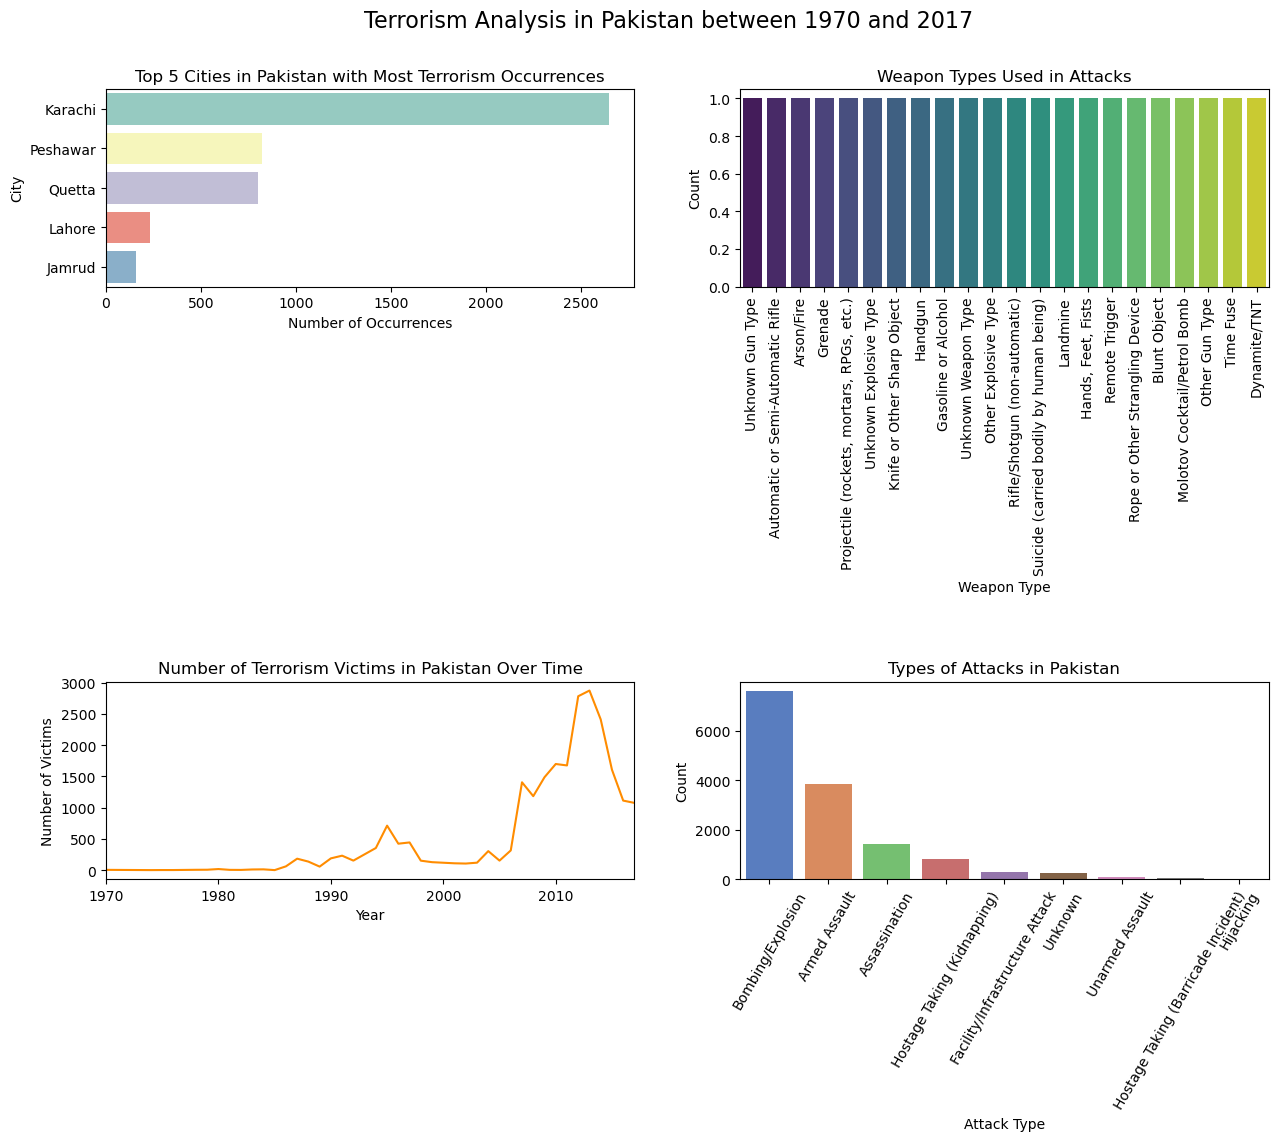

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities
sns.barplot(x='eventid', y='city', data=Pakistan_cities, ci=None, ax=axs[0, 0], palette='Set3')
axs[0, 0].set_title(f'Top 5 Cities in Pakistan with Most Terrorism Occurrences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Number of Occurrences')

# Plot 2 - Weapon Types
sns.countplot(x='weapsubtype2_txt', data=Pakistan_weapon, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[0, 1].set_xlabel('Weapon Type')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Weapon Types Used in Attacks')

# Plot 3 - Victims through the years
sns.lineplot(x='iyear', y='nkill', data=Pakistan_year, ax=axs[1, 0], color='darkorange')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Number of Terrorism Victims in Pakistan Over Time')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Victims')

# Plot 4 - Attack Types
sns.barplot(x='attacktype1_txt', y='eventid', data=Pakistan_attack_type, ci=None, ax=axs[1, 1], palette='muted')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=60)
axs[1, 1].set_xlabel('Attack Type')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Types of Attacks in Pakistan')

plt.suptitle('Terrorism Analysis in Pakistan between 1970 and 2017', size=16)
plt.subplots_adjust(top=0.90, hspace=2)  # Adjust the value of hspace as needed
plt.show()


# CONCLUSION

**As a security or defense analyst, looking at the above data analytical technniques, we can conclude that "Middle East and North Africa(MENA)" is the hot zone where most number of terrorist attacks have happened in the past.**

**Here are some insights and conclusions related to global terrorism:**

Increasing Global Terrorist Incidents: Over the past few decades, there has been a significant increase in the number of terrorist incidents worldwide. This trend indicates the persistent threat of terrorism and the need for continued efforts to counter it.

Concentration of Terrorism in Certain Regions: Terrorism is not evenly distributed globally, and certain regions have experienced a higher concentration of terrorist activities. The Middle East, South Asia, and North Africa have historically been hotspots for terrorism due to factors such as political instability, ideological conflicts, and socioeconomic grievances.

Shifts in Terrorist Tactics: Terrorist organizations have adapted their tactics over time. There has been a shift from large-scale, coordinated attacks to more decentralized and smaller-scale attacks, including lone-wolf and small-cell operations. The increased use of suicide bombings and vehicle attacks is also notable.

Impact of Terrorism on Civilian Population: Terrorism has a significant impact on civilian populations. It causes loss of life, injuries, psychological trauma, and displacement. Additionally, it can disrupt economies, infrastructure, and social cohesion within affected regions.

Motivations and Ideologies: Terrorism is driven by a variety of motivations and ideologies. These can include religious extremism, separatism, ethnonationalism, political ideologies, and socio-economic grievances. Understanding the underlying motivations is crucial for developing effective counterterrorism strategies.

Counterterrorism Measures: Governments and international organizations have implemented various counterterrorism measures to combat the threat. These measures include intelligence sharing, law enforcement cooperation, military operations, counter-radicalization programs, and efforts to address root causes of terrorism such as poverty and marginalization.

Long-term Prevention and Resilience: Building resilient societies and addressing the root causes of terrorism are crucial for long-term prevention. This involves promoting good governance, protecting human rights, addressing socio-economic disparities, and fostering inclusive societies that discourage the emergence of extremist ideologies.